In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/tykiww/projectpage/master/datasets/credit/Credit.csv')
df=df.iloc[:,1:]

In [2]:
df.head().T

,0,1,2,3,4
Income,14.891,106.025,104.593,148.924,55.882
Limit,3606,6645,7075,9504,4897
Rating,283,483,514,681,357
Cards,2,3,4,3,2
Age,34,82,71,36,68
Education,11,15,11,11,16
Gender,Male,Female,Male,Female,Male
Student,No,Yes,No,No,No
Married,Yes,Yes,No,No,Yes
Ethnicity,Caucasian,Asian,Asian,Asian,Caucasian


In [3]:
df2=pd.get_dummies(df,columns=['Gender','Student','Married','Ethnicity'])

In [4]:

df2=(df2-df2.mean())/df2.std()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df2)
pca.explained_variance_ratio_

array([0.21565593, 0.13908506, 0.12920438, 0.11701967, 0.10304477,
       0.07963194, 0.06494692, 0.06240724, 0.05839719, 0.02928619])

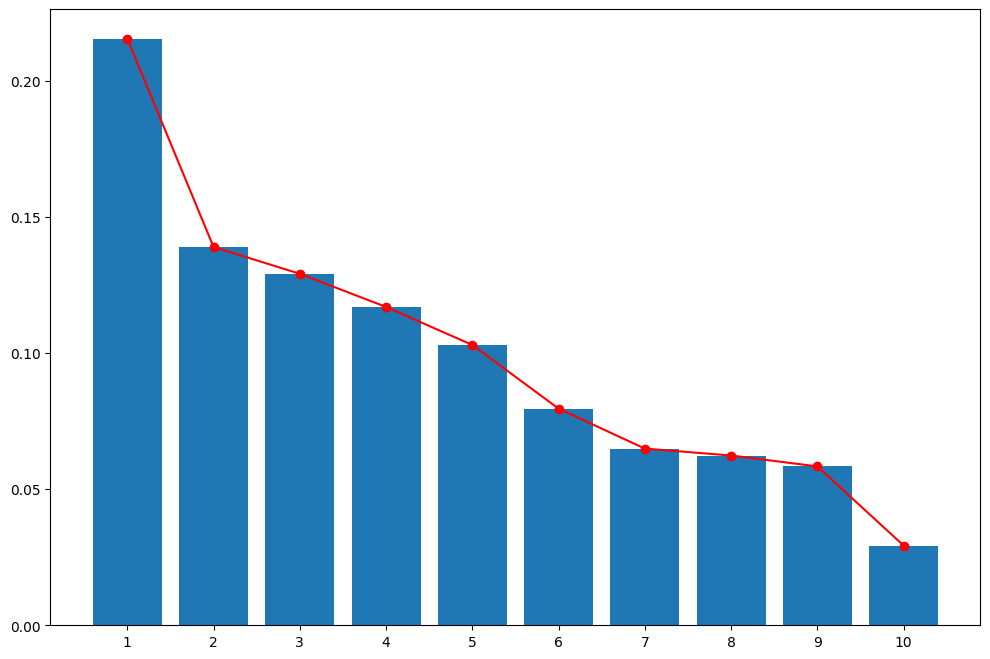

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(range(0,10), pca.explained_variance_ratio_,tick_label=range(1,11))
plt.plot(pca.explained_variance_ratio_, 'or-')

In [7]:
## PCA로 변환
Z=pca.transform(df2)
data = Z[:,:2]

c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

<BarContainer object of 8 artists>

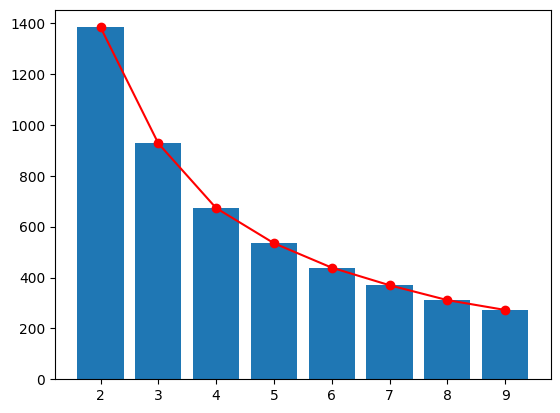

In [8]:
from sklearn.cluster import KMeans
k = []
error = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    k.append(i)
    error.append(kmeans.inertia_)


plt.plot(range(8),error,'-ro')
plt.bar(range(8),error,tick_label=k)

In [9]:
kmeans = KMeans(5)
kmeans.fit(data)

c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

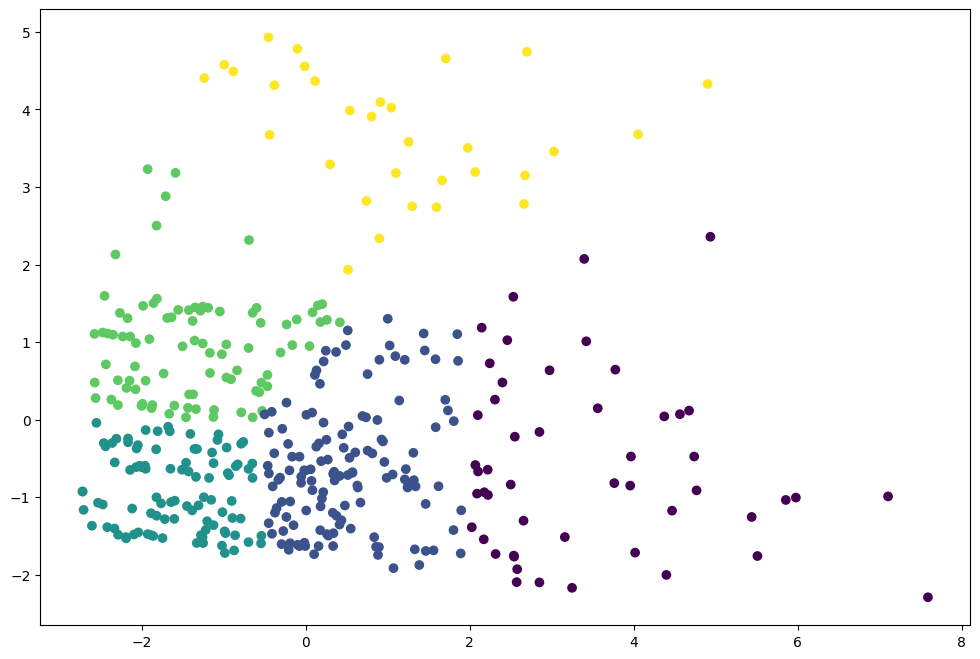

In [10]:
plt.figure(figsize=(12,8))
z1 = data[:,0]
z2 = data[:,1]
plt.scatter(z1,z2,c=kmeans.labels_)

In [11]:
factor1=pca.components_[0,:]
factor2=pca.components_[1,:]

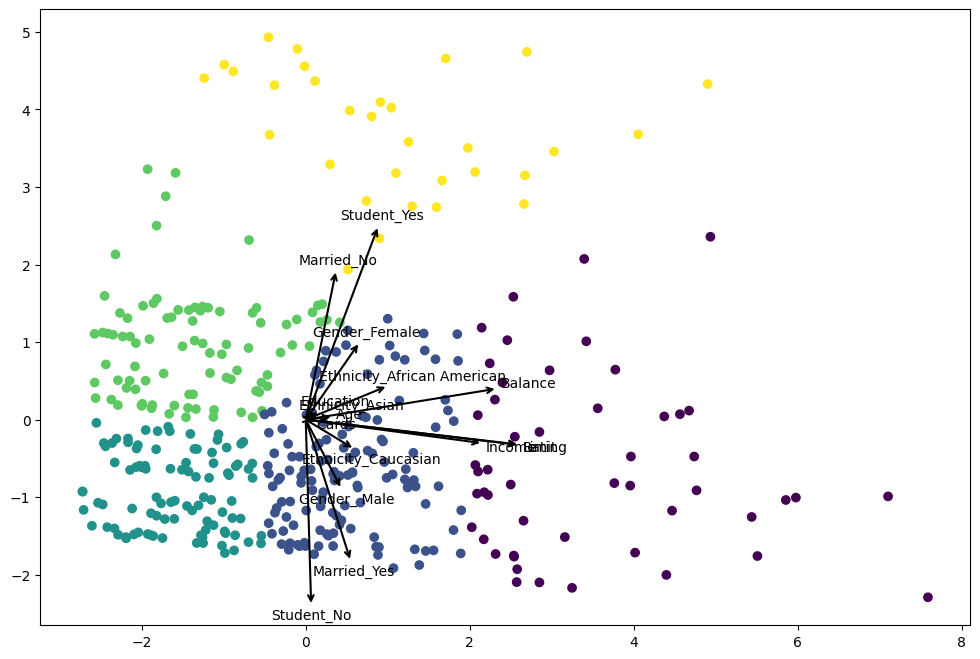

In [12]:

plt.figure(figsize=(12,8))
plt.scatter(z1,z2,c=kmeans.labels_)
for i in range(len(df2.columns)):
    plt.annotate(df2.columns[i],xy=(0,0),xytext=(factor1[i]*5,factor2[i]*5),arrowprops={'lw':1.5, 'arrowstyle':'<-'})